In [3]:


from pathlib import Path
from utils.data_loader import load_crime_dataset

import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df_crime_path = Path('../datasets/chicago-crime-data.csv')


In [17]:
# Converting result into dataframe
df = pd.read_csv(df_crime_path)
df.head(4)

id case_number                     date                   block  \
0  13647521    JH488715  2024-10-27T00:00:00.000  045XX W WELLINGTON AVE   
1  13644362    JH484829  2024-10-27T00:00:00.000    015XX N LOCKWOOD AVE   
2  13646926    JH486773  2024-10-27T00:00:00.000    039XX W CORNELIA AVE   
3  13643859    JH484227  2024-10-27T00:00:00.000     066XX N OLYMPIA AVE   

   iucr     primary_type               description location_description  \
0  1320  CRIMINAL DAMAGE                TO VEHICLE               STREET   
1  0710            THEFT  THEFT FROM MOTOR VEHICLE               STREET   
2  1320  CRIMINAL DAMAGE                TO VEHICLE               STREET   
3  0486          BATTERY   DOMESTIC BATTERY SIMPLE            RESIDENCE   

   arrest  domestic  ...  community_area  fbi_code  x_coordinate  \
0   False     False  ...            20.0        14     1145677.0   
1   False     False  ...            25.0        06     1140747.0   
2   False     False  ...            21.0        14     1149691.0   
3    True      True  ...             9.0       08B     1125451.0   

   y_coordinate  year               updated_on   latitude  longitude  \
0     1919561.0  2024  2024-11-03T15:42:31.000  41.935271 -87.740045   
1     1909683.0  2024  2024-11-03T15:42:31.000  41.908256 -87.758406   
2     1922983.0  2024  2024-11-03T15:42:31.000  41.944584 -87.725204   
3     1943751.0  2024  2024-11-03T15:42:31.000  42.002011 -87.813839   

                                            location  \
0  {'latitude': '41.935270542', 'longitude': '-87...   
1  {'latitude': '41.908256441', 'longitude': '-87...   
2  {'latitude': '41.944583619', 'longitude': '-87...   
3  {'latitude': '42.002010603', 'longitude': '-87...   

   :@computed_region_awaf_s7ux  
0                          7.0  
1                          4.0  
2                         27.0  
3                         34.0  

[4 rows x 23 columns]

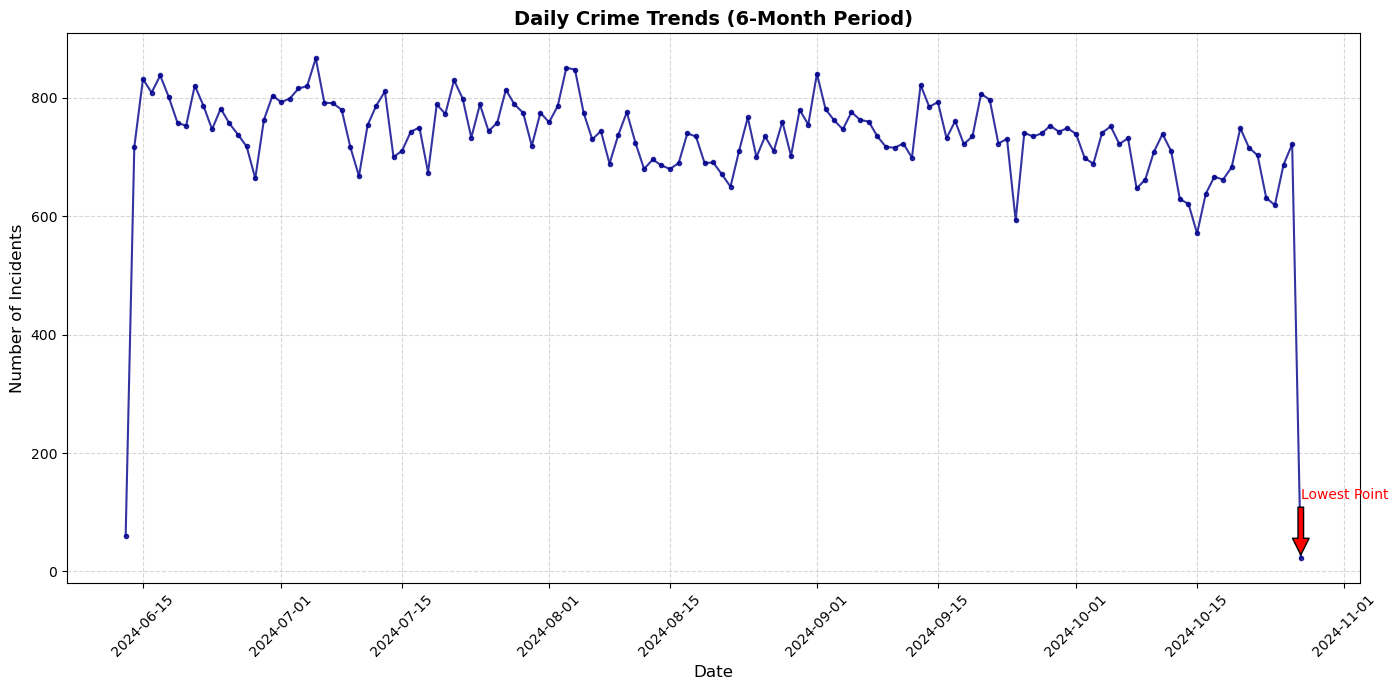

<Figure size 640x480 with 0 Axes>

In [20]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Group by the date and count the number of incidents
daily_trends = df.groupby(df['date'].dt.date).size()

# Plot the daily crime trends for the 6-month period
plt.figure(figsize=(14, 7))
plt.plot(daily_trends.index, daily_trends.values, color='darkblue', marker='o', markersize=3, linestyle='-', alpha=0.8)
plt.title('Daily Crime Trends (6-Month Period)', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Annotate significant changes, if any
min_value_date = daily_trends.idxmin()
min_value = daily_trends.min()
plt.annotate('Lowest Point', xy=(min_value_date, min_value), xytext=(min_value_date, min_value + 100),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=10, color='red')

plt.show()

plt.savefig("Crime Analysis.png")